In [35]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train , y_train), (x_test , y_test) =mnist.load_data()

In [36]:
import numpy as np

x_train = x_train / 255
x_test = x_test / 255

x_train = np.expand_dims(x_train, axis = -1)

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
x_test = np.expand_dims(x_test, axis = -1)

In [39]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

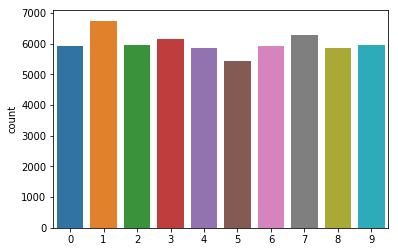

In [40]:
import seaborn as sns

sns.countplot(y_test)
sns.countplot(y_train)

In [41]:
#one-hot
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [42]:
np.argmax(y_train[:10], axis = 1)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1,)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten()) #  (batch_size, 28x28x1)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 257,802
Trainable params: 257,802
Non-trainable params: 0
________________________________________________

In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #nincs callback, kellene
model.fit(x_train , y_train, validation_split = 0.2, batch_size = 128, epochs = 5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 114s 2ms/step - loss: 0.1910 - accuracy: 0.9451 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 2/5
48000/48000 [==============================] - 108s 2ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0491 - val_accuracy: 0.9857
Epoch 3/5
48000/48000 [==============================] - 115s 2ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 4/5
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0370 - val_accuracy: 0.9904
Epoch 5/5
48000/48000 [==============================] - 111s 2ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0345 - val_accuracy: 0.9907


In [50]:
preds = model.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print(accuracy_score(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

0.9927


In [52]:
conf = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(preds,axis=1))

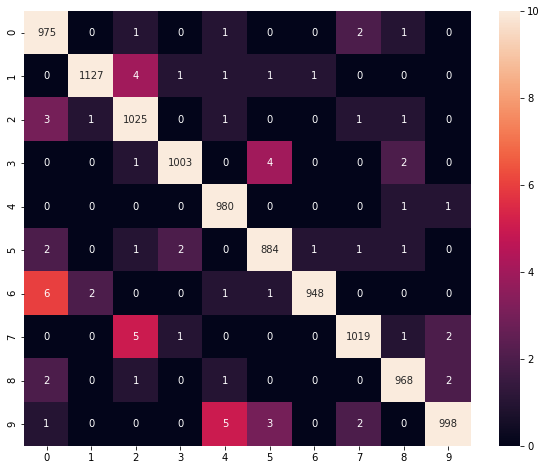

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(conf, annot=True, fmt='.0f', vmax = 10)

In [59]:
#6 helyett 0-t predikál
preds[(np.argmax(y_test, axis = 1) == 6) & (np.argmax(preds, axis = 1) == 0) ]

array([[5.53327501e-01, 5.71035619e-09, 1.00539899e-06, 5.36637401e-07,
        9.14069766e-04, 4.93852422e-03, 4.19132710e-01, 1.02173055e-06,
        2.16609910e-02, 2.36512715e-05],
       [8.23267698e-01, 1.00328268e-09, 2.65093831e-08, 3.52183207e-07,
        3.04407166e-07, 1.54200767e-03, 1.72628015e-01, 4.94631536e-09,
        2.56136921e-03, 2.14617003e-07],
       [8.96282494e-01, 6.66516030e-07, 1.54150382e-06, 5.84282589e-07,
        4.35252339e-02, 7.92392541e-07, 5.19145690e-02, 5.79579762e-07,
        8.23251065e-03, 4.12954723e-05],
       [5.81788659e-01, 4.15290197e-05, 1.86941106e-04, 1.35824903e-05,
        3.59275215e-03, 1.73965513e-04, 4.13186222e-01, 7.83663745e-06,
        9.80502809e-04, 2.80187796e-05],
       [9.95792150e-01, 8.11016199e-10, 7.81807241e-09, 2.74715255e-08,
        5.80481501e-05, 3.07231276e-05, 4.09421604e-03, 1.79471826e-09,
        2.46047202e-05, 2.25728755e-07],
       [8.17221403e-01, 5.12796623e-06, 1.71840625e-07, 9.76985604e-09,
   

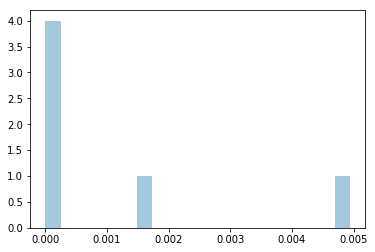

In [60]:
sns.distplot((preds[(np.argmax(y_test,axis=1)==6) & (np.argmax(preds,axis=1)==0)])[:,5], kde=False, bins=20)

In [61]:
rossz6os = x_test[(np.argmax(y_test,axis=1)==6) & (np.argmax(preds,axis=1)==0)]

In [62]:
rossz6os.shape

(6, 28, 28, 1)

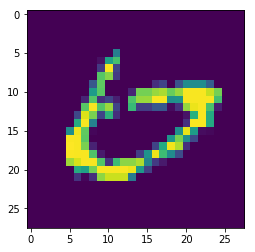

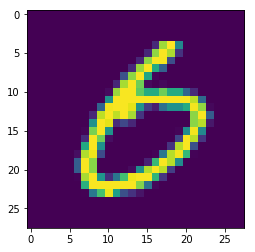

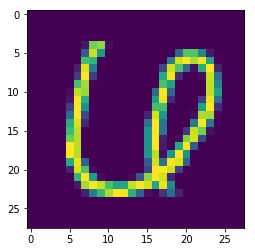

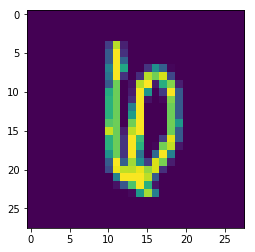

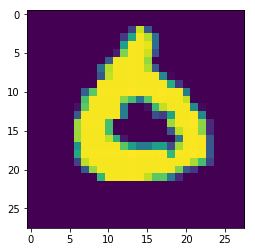

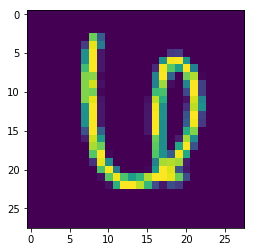

In [63]:
for i in range(rossz6os.shape[0]):
  plt.figure()
  plt.imshow(rossz6os[i,:,:,0])